In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test_id = df_test["PassengerId"]
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Check for Balanced Dataset

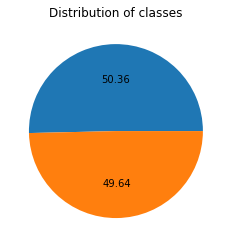

In [3]:
y = df["Transported"]

plt.pie(y.value_counts(), autopct="%0.2f")
plt.title("Distribution of classes")
plt.show()

# Check for Missing Entries

In [4]:
print(df.isna().any())

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool


In [5]:
print(df_test.isna().any())

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
dtype: bool


# Identify Unique Entries

In [6]:
print(df["HomePlanet"].unique())
print(df["Destination"].unique())

['Europa' 'Earth' 'Mars' nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [7]:
df[['Group','People']] = df['PassengerId'].str.split('_',expand=True)
df = df.drop(['PassengerId'], axis=1)

df[['Deck','Num', 'Side']] = df['Cabin'].str.split('/',expand=True)
df = df.drop(['Cabin'], axis=1)

print(df['Group'].unique())
print(df['People'].unique())
print(df['Deck'].unique())
print(df['Num'].unique())
print(df['Side'].unique())

['0001' '0002' '0003' ... '9278' '9279' '9280']
['01' '02' '03' '04' '05' '06' '07' '08']
['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['0' '1' '2' ... '1892' '1893' '1894']
['P' 'S' nan]


# Special Cases

In [8]:
dfcabin = df[['Deck', 'Num', 'Side']]
df_no_cabin = dfcabin[dfcabin.isnull().any(axis=1)]
df_no_cabin

,Deck,Num,Side
15,NaN,NaN,NaN
93,NaN,NaN,NaN
103,NaN,NaN,NaN
222,NaN,NaN,NaN
227,NaN,NaN,NaN
...,...,...,...
8209,NaN,NaN,NaN
8475,NaN,NaN,NaN
8485,NaN,NaN,NaN
8509,NaN,NaN,NaN
